In [1]:
# import all required packages

import requests # get and post data to anf from websites
from bs4 import BeautifulSoup # get html from a website
import selenium # interacting with a website
import pandas as pd # good for working with dataframes
#pip install wordcloud # run this line once to install the wordcloud package
from wordcloud import WordCloud # create wordclouds
import matplotlib.pyplot as plt # used to plot the wordcloud
import math

In [2]:
# Supply the URL that you would like to scrape
quotes_url = 'https://quotes.toscrape.com/' 
# Pull (download) all html data from the URL supplied above
html_text = requests.get(quotes_url).text 
#Parse the pull html data - make it look pretty
quotes_soup = BeautifulSoup(html_text, 'html.parser')

#Print out the html data that was just pulled. It is identical to the websites html code.
print(quotes_soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="

In [3]:
# Use the find_all function to pull just the html for each quote
quote = quotes_soup.find_all('span', class_='text')

print(quote)
# Notice that the html information is still attached to each quote. i.e. the span tag <span></span> 
# and the class and itemprop attributes

[<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>, <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>, <span class="text" itemprop="text">“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”</span>, <span class="text" itemprop="text">“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”</span>, <span class="text" itemprop="text">“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”</span>, <span class="text" itemprop="text">“Try not to become a man of success. Rather become a man of value.”</span>, <span class="text" itemprop="text">“It is better to be hated for what you are than to be loved for what you are not.”</spa

In [4]:
# We can remove the html information with .item. Remeber that [] are used to access different elements in a list.
# quote[0].text will return the text portion of the first element from the variable quote
print(quote[0].text)


“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”


In [5]:
# The easiest way remove the html from all quotes is with a for loop
quotes = [] # create a new empty list to append the text to at the end of each loop iteration
for i in quote:
    quotes.append(i.text) #append will add each iteration to the list quotes

print(quotes)
#Now we have just the quotes

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”']


In [6]:
# The previous code scrapped data for the first page of https://quotes.toscrape.com/
# There are about another 15 pages of quotes though

# So we will create a list of URL's, one for each page, and scrape all of then
pages = [] 
for i in range(0,20):
    page = "https://quotes.toscrape.com" + '/page/' + str(i) + '/' # create a string of the url, with each loop the page number increases by one 
    pages.append(page) # write each url to a string

print(pages)


['https://quotes.toscrape.com/page/0/', 'https://quotes.toscrape.com/page/1/', 'https://quotes.toscrape.com/page/2/', 'https://quotes.toscrape.com/page/3/', 'https://quotes.toscrape.com/page/4/', 'https://quotes.toscrape.com/page/5/', 'https://quotes.toscrape.com/page/6/', 'https://quotes.toscrape.com/page/7/', 'https://quotes.toscrape.com/page/8/', 'https://quotes.toscrape.com/page/9/', 'https://quotes.toscrape.com/page/10/', 'https://quotes.toscrape.com/page/11/', 'https://quotes.toscrape.com/page/12/', 'https://quotes.toscrape.com/page/13/', 'https://quotes.toscrape.com/page/14/', 'https://quotes.toscrape.com/page/15/', 'https://quotes.toscrape.com/page/16/', 'https://quotes.toscrape.com/page/17/', 'https://quotes.toscrape.com/page/18/', 'https://quotes.toscrape.com/page/19/']


In [7]:
# lets create a list containing all the html content for each author and each quote
quote_soup = []
author_soup = []
for i in range(1,len(pages)):
    quotes_url = pages[i] 
    html_text = requests.get(quotes_url).text 
    quotes_soup = BeautifulSoup(html_text, 'html.parser')
    quote = quotes_soup.find_all('span', class_='text')
    author = quotes_soup.find_all('small', class_='author')
    quote_soup = quote_soup + quote
    author_soup = author_soup + author   

print(author_soup) 


[<small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">J.K. Rowling</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">Jane Austen</small>, <small class="author" itemprop="author">Marilyn Monroe</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">André Gide</small>, <small class="author" itemprop="author">Thomas A. Edison</small>, <small class="author" itemprop="author">Eleanor Roosevelt</small>, <small class="author" itemprop="author">Steve Martin</small>, <small class="author" itemprop="author">Marilyn Monroe</small>, <small class="author" itemprop="author">J.K. Rowling</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">Bob Marley</small>, <small class="author" itemprop="author">Dr. Seuss</small>, <small class="author" itemprop="author">Douglas Adam

In [8]:
authors = []
quotes = []
for i in range(1,len(author_soup)):    
    authors.append(author_soup[i].text)
    quotes.append(quote_soup[i].text)

print(authors)


['J.K. Rowling', 'Albert Einstein', 'Jane Austen', 'Marilyn Monroe', 'Albert Einstein', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin', 'Marilyn Monroe', 'J.K. Rowling', 'Albert Einstein', 'Bob Marley', 'Dr. Seuss', 'Douglas Adams', 'Elie Wiesel', 'Friedrich Nietzsche', 'Mark Twain', 'Allen Saunders', 'Pablo Neruda', 'Ralph Waldo Emerson', 'Mother Teresa', 'Garrison Keillor', 'Jim Henson', 'Dr. Seuss', 'Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Bob Marley', 'Dr. Seuss', 'J.K. Rowling', 'Bob Marley', 'Mother Teresa', 'J.K. Rowling', 'Charles M. Schulz', 'William Nicholson', 'Albert Einstein', 'Jorge Luis Borges', 'George Eliot', 'George R.R. Martin', 'C.S. Lewis', 'Marilyn Monroe', 'Marilyn Monroe', 'Albert Einstein', 'Marilyn Monroe', 'Marilyn Monroe', 'Martin Luther King Jr.', 'J.K. Rowling', 'James Baldwin', 'Jane Austen', 'Eleanor Roosevelt', 'Marilyn Monroe', 'Albert Einstein', 'Haruki Murakami', 'Alexandre Dumas fils', 'Stephenie Meyer', 'Ernest 

In [9]:
scraped_dat = pd.DataFrame({'authors':authors, 'quotes':quotes}) # create a dataframe with 2 columns, named authors and quotes that contain the relevant scraped data

print(scraped_dat)

               authors                                             quotes
0         J.K. Rowling  “It is our choices, Harry, that show what we t...
1      Albert Einstein  “There are only two ways to live your life. On...
2          Jane Austen  “The person, be it gentleman or lady, who has ...
3       Marilyn Monroe  “Imperfection is beauty, madness is genius and...
4      Albert Einstein  “Try not to become a man of success. Rather be...
..                 ...                                                ...
94          Harper Lee  “You never really understand a person until yo...
95   Madeleine L'Engle  “You have to write the book that wants to be w...
96          Mark Twain  “Never tell the truth to people who are not wo...
97           Dr. Seuss        “A person's a person, no matter how small.”
98  George R.R. Martin  “... a mind needs books as a sword needs a whe...

[99 rows x 2 columns]


In [10]:
#scraped_dat.to_csv('your/path/scraped_dat.csv')

In [11]:
# Create and generate a word cloud image of quotes
quotes=" ".join(map(str,quotes)) # turns the list of quotes into a single string of all quotes i.e. ['a', 'b', 'c'] -> 'a b c'
print(quotes)
wordcloud = WordCloud().generate(quotes)

“It is our choices, Harry, that show what we truly are, far more than our abilities.” “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.” “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” “Try not to become a man of success. Rather become a man of value.” “It is better to be hated for what you are than to be loved for what you are not.” “I have not failed. I've just found 10,000 ways that won't work.” “A woman is like a tea bag; you never know how strong it is until it's in hot water.” “A day without sunshine is like, you know, night.” “This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they

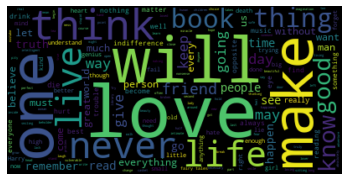

In [12]:
# Display the wordcloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
# Often we're interested in scraping data that is associated with specific tags, such as a Twitter #tag. 
# Lets scape quotes with the inspirational tag.

pages = [] 
for i in range(1,2):
    page = "https://quotes.toscrape.com" + '/tag/inspirational/page/' + str(i) + '/' # create a string of the url, with each loop the page number increases by one 
    pages.append(page) # write each url to a string

inspirational_soup = []
for i in range(0,len(pages)):
    quotes_url = pages[i] 
    html_text = requests.get(quotes_url).text 
    quotes_soup = BeautifulSoup(html_text, 'html.parser')
    inspirational_soup = quotes_soup.find_all('span', class_='text')

inspirational_quotes = []

for i in range(1,len(inspirational_soup)):    
    inspirational_quotes.append(inspirational_soup[i].text)

print(inspirational_quotes)

["“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", "“I have not failed. I've just found 10,000 ways that won't work.”", "“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everyt

In [14]:
# We will look at scraping data from a different website, Books to scrape "https://books.toscrape.com"

pages = [] 
for i in range(0,20):
    page = "https://books.toscrape.com" + '/catalogue/page-' + str(i) + '.html' # create a string of the url, with each loop the page number increases by one 
    pages.append(page) # write each url to a string

#check that the first and last URL's look correct.
print(pages[0], pages[-1]) # remember, [-1] indexes to the last from the end

https://books.toscrape.com/catalogue/page-0.html https://books.toscrape.com/catalogue/page-19.html


In [15]:
price_soup = []
for i in range(0,len(pages)):
    price_url = pages[i] 
    html_text = requests.get(price_url).text 
    soup = BeautifulSoup(html_text, 'html.parser')
    price = soup.find_all('p', class_='price_color')
    price_soup = price_soup + price
    
print(price_soup)   

[<p class="price_color">Â£51.77</p>, <p class="price_color">Â£53.74</p>, <p class="price_color">Â£50.10</p>, <p class="price_color">Â£47.82</p>, <p class="price_color">Â£54.23</p>, <p class="price_color">Â£22.65</p>, <p class="price_color">Â£33.34</p>, <p class="price_color">Â£17.93</p>, <p class="price_color">Â£22.60</p>, <p class="price_color">Â£52.15</p>, <p class="price_color">Â£13.99</p>, <p class="price_color">Â£20.66</p>, <p class="price_color">Â£17.46</p>, <p class="price_color">Â£52.29</p>, <p class="price_color">Â£35.02</p>, <p class="price_color">Â£57.25</p>, <p class="price_color">Â£23.88</p>, <p class="price_color">Â£37.59</p>, <p class="price_color">Â£51.33</p>, <p class="price_color">Â£45.17</p>, <p class="price_color">Â£12.84</p>, <p class="price_color">Â£37.32</p>, <p class="price_color">Â£30.52</p>, <p class="price_color">Â£25.27</p>, <p class="price_color">Â£34.53</p>, <p class="price_color">Â£54.64</p>, <p class="price_color">Â£22.50</p>, <p class="price_color">Â£53

In [21]:
prices = []
for i in range(1,len(price_soup)):    
    prices.append(price_soup[i].text)

print(prices)

['Â£53.74', 'Â£50.10', 'Â£47.82', 'Â£54.23', 'Â£22.65', 'Â£33.34', 'Â£17.93', 'Â£22.60', 'Â£52.15', 'Â£13.99', 'Â£20.66', 'Â£17.46', 'Â£52.29', 'Â£35.02', 'Â£57.25', 'Â£23.88', 'Â£37.59', 'Â£51.33', 'Â£45.17', 'Â£12.84', 'Â£37.32', 'Â£30.52', 'Â£25.27', 'Â£34.53', 'Â£54.64', 'Â£22.50', 'Â£53.13', 'Â£40.30', 'Â£44.18', 'Â£17.66', 'Â£31.05', 'Â£23.82', 'Â£36.89', 'Â£15.94', 'Â£33.29', 'Â£18.02', 'Â£19.63', 'Â£52.22', 'Â£33.63', 'Â£57.31', 'Â£26.41', 'Â£47.61', 'Â£23.11', 'Â£45.07', 'Â£31.77', 'Â£50.27', 'Â£14.27', 'Â£44.18', 'Â£18.78', 'Â£25.52', 'Â£16.28', 'Â£31.12', 'Â£19.49', 'Â£17.27', 'Â£19.09', 'Â£56.13', 'Â£56.41', 'Â£56.50', 'Â£45.22', 'Â£38.16', 'Â£54.11', 'Â£42.96', 'Â£23.89', 'Â£16.77', 'Â£20.59', 'Â£37.13', 'Â£56.06', 'Â£58.11', 'Â£49.05', 'Â£40.76', 'Â£19.73', 'Â£32.24', 'Â£41.83', 'Â£39.58', 'Â£39.25', 'Â£25.02', 'Â£51.04', 'Â£19.83', 'Â£50.40', 'Â£13.61', 'Â£13.34', 'Â£18.97', 'Â£36.28', 'Â£10.16', 'Â£15.44', 'Â£48.41', 'Â£46.35', 'Â£14.07', 'Â£14.86', 'Â£33.37', 'Â£56.40'

In [22]:
# The data looks like its a string type. i.e. a character or numbers contained in inverted commas.
type(prices[0])

str

In [18]:
# 
for i in range(0,len(prices)):
    prices[i] = prices[i].replace('£', '') # replace is a pandas function, here we replace £ with nothing
    prices[i] = prices[i].replace('Â', '')
    prices[i] = float(prices[i]) # change from character to float number
    prices[i] = math.floor(prices[i]) # round prices down to whole integer number

print(prices)

[53, 50, 47, 54, 22, 33, 17, 22, 52, 13, 20, 17, 52, 35, 57, 23, 37, 51, 45, 12, 37, 30, 25, 34, 54, 22, 53, 40, 44, 17, 31, 23, 36, 15, 33, 18, 19, 52, 33, 57, 26, 47, 23, 45, 31, 50, 14, 44, 18, 25, 16, 31, 19, 17, 19, 56, 56, 56, 45, 38, 54, 42, 23, 16, 20, 37, 56, 58, 49, 40, 19, 32, 41, 39, 39, 25, 51, 19, 50, 13, 13, 18, 36, 10, 15, 48, 46, 14, 14, 33, 56, 14, 46, 45, 19, 40, 53, 35, 22, 57, 29, 54, 46, 33, 22, 29, 15, 21, 54, 37, 51, 43, 36, 17, 29, 28, 49, 37, 28, 30, 42, 56, 16, 55, 28, 52, 54, 21, 43, 21, 41, 35, 59, 52, 58, 24, 42, 12, 17, 33, 27, 51, 36, 10, 43, 38, 37, 44, 43, 55, 37, 10, 41, 36, 44, 55, 17, 23, 41, 32, 38, 33, 10, 27, 55, 16, 26, 12, 23, 29, 20, 43, 36, 20, 41, 14, 38, 41, 30, 28, 10, 16, 13, 48, 19, 57, 42, 22, 49, 29, 21, 29, 53, 41, 54, 34, 37, 35, 42, 19, 19, 49, 37, 30, 27, 11, 36, 15, 15, 46, 18, 36, 50, 12, 24, 43, 37, 14, 52, 38, 19, 53, 12, 37, 46, 45, 22, 25, 27, 43, 56, 25, 32, 27, 52, 46, 44, 37, 54, 16, 28, 10, 44, 23, 17, 54, 40, 52, 28, 13,